<center>
Reinforcement Learning

# Practice 3 - Dynamic Programming

    
</center>

The purpose of this project is to study different properties of dynamic programming methods. 

In [1]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt

**General Notes:**
- Questions marked with * are optional for COMP4240 - Undergraduate section. Questions marked as extra credit are optional for everyone.
- Do not use a mix of python lists and numpy arrays. Every vector or matrix in your code should be a numpy array. 
- For functions that exist in both the python core and the numpy library, use the one in the numpy library. For example, use `np.max` instead of `max`. Another example: use `np.random.normal` instead of `random.gauss`.
- Make sure all of your plots have a proper size and include `xlabel`, `ylabel`, `legend`, `title`, and `grid`.

## Part I
Consider a cleaning robot that must collect an empty can and also has to recharge its batteries.
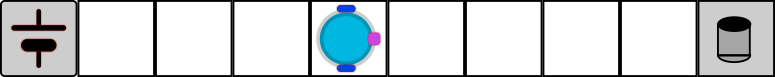

This problem has a discrete state space $S=\{0,…,9\}$, where state $s$ describes the position of the robot in the corridor. The robot has only two actions $A=\{-1,1\}$ for going one step to the left or right. States $0$ and $9$ are terminal, meaning that once the robot reaches either of them it can no longer leave, regardless of the action, and the episode ends. We assume this is a deterministic environment with $\gamma=0.9$.



### I.1 
Write a function that describes the transition function $s'=T(s,a)$ and test it for a few state-action pairs including terminal states. This is a deterministic transition function meaning given the current state and action, it should return the next state. Note that the transition function describes robot’s environment model and should not allow the robot to move outside the environment.


In [2]:
def transition(s, a):
    # this function should return next state
    #--- Your code here ---#
    if s == 0 or s == 9:
        return s
    else:
        return s+a
    pass

### I.2
Write a reward function $R(s,a)$ that gives a reward of $+5$ for being at $s=8$ and taking action $a=1$ ; a reward $+1$ for being at $s=1$ and taking action $a=-1$ ; and reward $0$ otherwise.



In [3]:
def reward(s, a):
    # this function should return a scalar reward
    #--- Your code here ---#
    if s == 8 and a == 1:
        r = 5
    elif s == 1 and a == -1:
        r = 1
    else:
        r = 0
    return r
    pass

### I.3
Implement the value iteration algorithm to find $V^*(s)$ and $π^*(s)$. Note that instead of using the dynamics of the environment, $p(s',r|s,a)$, you should use the deterministic transition function $T(s,a)$ that allows you to remove looping over possible rewards and the probability of transitions (because it is a deterministic function). Print out the final $V^*(s)$ and $π^*(s)$.


In [4]:
#--- Your code here ---#
V = np.zeros(10)
action = np.array([-1,1])
gamma = 0.9
theta=10**-4
delta = 10
states = np.arange(len(V))
while delta >=theta:
    delta = 0
    for s in states:
        v = V[s]
        V_tmp = np.array([reward(s,a)+gamma*V[transition(s,a)] for a in action])
        V[s] = np.max(V_tmp)
        delta = np.maximum(delta,np.abs(v-V[s]))
pi = np.empty(len(states))
for s in states:
    pi[s] = np.argmax(np.array([reward(s,a)+gamma*V[transition(s,a)] for a in action]))
print(V)
print(pi)

[0.        2.3914845 2.657205  2.95245   3.2805    3.645     4.05
 4.5       5.        0.       ]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


<hr>

## Part II
A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of \$100, or loses by running out of money.

On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. This problem can be formulated as an **undiscounted** ($\gamma=1$), **episodic**, finite MDP.

The state is the gambler’s capital $s \in \{ 1,2,...,99\}$ and the actions are stakes $a \in \{ 0,1,..., min(s, 100-s)\}$. The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.
The state-value function then gives the probability of winning from each state.

A policy is mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal.
Let’s p_h denote the probability of the coin coming up heads. If $p_h$ is known the problem can be solved using value iteration.



### II.1
Implement the Gambler’s problem and then implement **value iteration** to solve the MDP for three scenarios where $p_h=\{0.4,0.25,0.55\}$ and find the optimal value function and optimal policy for each scenario.

**Tip**: When implementing, you might find it convenient to introduce two dummy states corresponding to termination with capital of 0 and 100, giving them values of 0 and 1 respectively.

In [5]:
#--- Your code here ---#
np.random.seed(235)
states = np.arange(1,100)
gamma =  1
theta = 10**-4


def reward(s, a):
    # this function should return a scalar reward
    #--- Your code here ---#
    if s+a == 100:
        r = 1
    else:
        r = 0
    return r

policy = []
V_prob = []
for pr_h in [0.4,0.25,0.55]:
    delta = 10
    V = np.zeros(len(states)+2)
    V[100] = 1
    V_sweep = []
    while True:
        delta = 0
        for s in states:
            action = np.arange(0,min(s,100-s)+1)
            v = V[s]
            V_tmp = np.array([pr_h*(reward(s,a)+gamma*V[s+a])+(1-pr_h)*(reward(s,a)+gamma*V[s-a]) for a in action])
            V[s] = np.max(V_tmp)
            delta = np.maximum(delta,np.abs(v-V[s]))
        # V_sweep = np.vstack((V_sweep,V))
        V_sweep.append(V.copy())
        if delta < theta:
            break
    V_prob.append(V_sweep)
    pi = np.zeros(len(V))
    for s in states:
        action = np.arange(0,min(s,100-s)+1)
        pi_tmp = np.array([pr_h*(reward(s,a)+gamma*V[s+a])+(1-pr_h)*(reward(s,a)+gamma*V[s-a]) for a in action])
        pi[s] = np.random.choice(np.flatnonzero(pi_tmp == np.max(pi_tmp)))
    policy.append(pi.copy())

### II.2
For all three scenarios:
1. Plot the change in the value function over successive sweeps of value iteration w.r.t capital (state).
2. Plot the final policy w.r.t capital (state). 



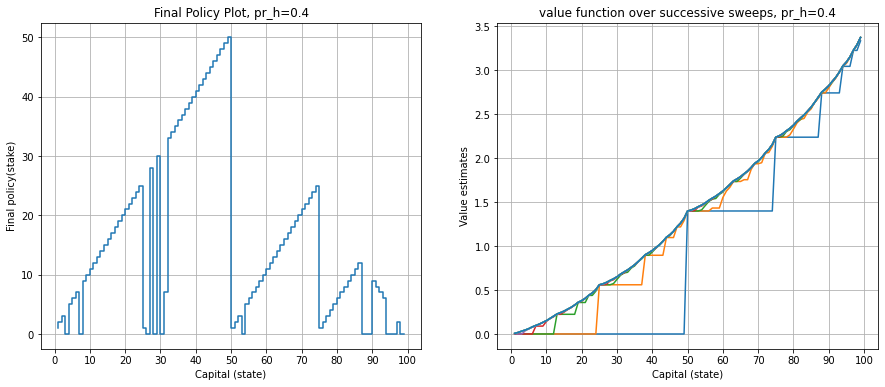

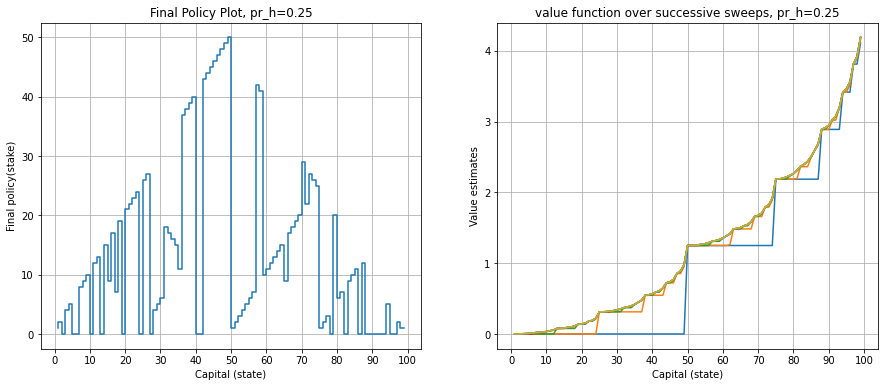

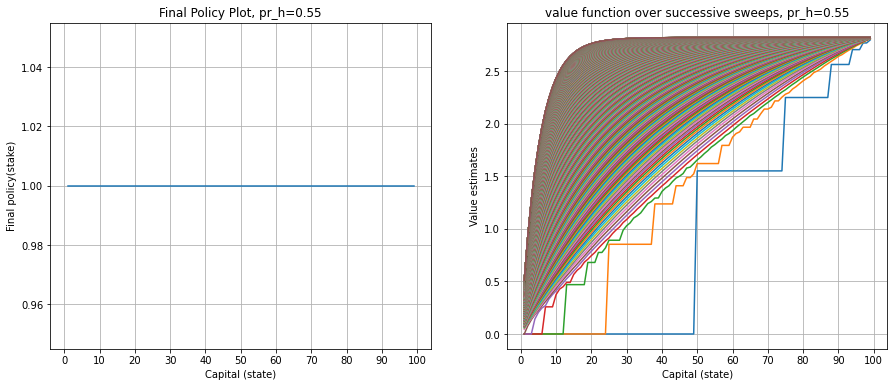

In [6]:
#--- Your code here ---#
pr = [0.4,0.25,0.55]
# print(V_prob)
for n_plot in range(3):
    pi = policy[n_plot]
    V_sweep = V_prob[n_plot]
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    plt.step(states,pi[1:len(pi)-1])
    plt.title('Final Policy Plot' + ', pr_h=' + str(pr[n_plot]))
    plt.xticks(range(0,101,10))
    plt.grid()
    plt.xlabel('Capital (state)')
    plt.ylabel('Final policy(stake)')


    plt.subplot(122)
    for sweep in V_sweep:
        plt.plot(states,sweep[1:len(sweep)-1])
    plt.title('value function over successive sweeps' + ', pr_h=' + str(pr[n_plot]))
    plt.xticks(range(0,101,10))
    plt.grid()
    plt.xlabel('Capital (state)')
    plt.ylabel('Value estimates')
    plt.show()

### II.3
Answer the following questions:
1. What action does your optimal policy suggest for capital of 50? What about for capital of 51?
> Answer:
 When pr_h = 0.4 and 0.25, My optimal policy suggests to stake 50 for capital of 50. It suggests to stake 1 for capital of 51.
 However, when pr_h = 0.55, it suggests to stake 1 for both capital of 50 and 51.

2. Why do you think your optimal policy is a good policy? Explain.
> Answer: The optimal policy is a good policy. The reason is explained with a few examples.
 For instance, at pr_h = 0.4 and 0.25, it suggests to stake 50 for capital of 50 to get a reward of 1. But when capital is 51, it suggests to stake only 1, which makes sense. Because if one loose 1, then he/she will return to 50, staking for 50 again and can achieve more reward with low episodes. The lower the episodes, the higher the chance to win, as pr_h is lower than 0.5.
 To explain the case of pr_h = 0.55, it is noted that in our problem, as the discount factor is 1 and wining probability is high, there is no rush to end the game. Moreover, though the policy get more reward from the $1^{st}$ part of Bellman equation $p_h*[r+V(s')]$ when one stakes more amount at any state (s' close to 99), it also gets less reward from the $2^{nd}$ part $(1-p_h)*[r+V(s')]$(s' close to 1) Therefore, the policy stake 1 at any capital.
    


## Part III
Test the algorithm by decreasing $\theta$ the threshold for accuracy of value function estimation. What happens when $\theta \rightarrow 0$? 
Add any helpful code/graphs if you have.

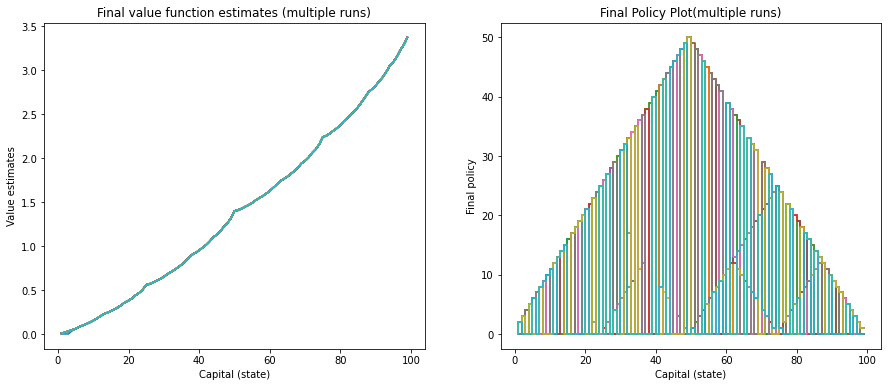

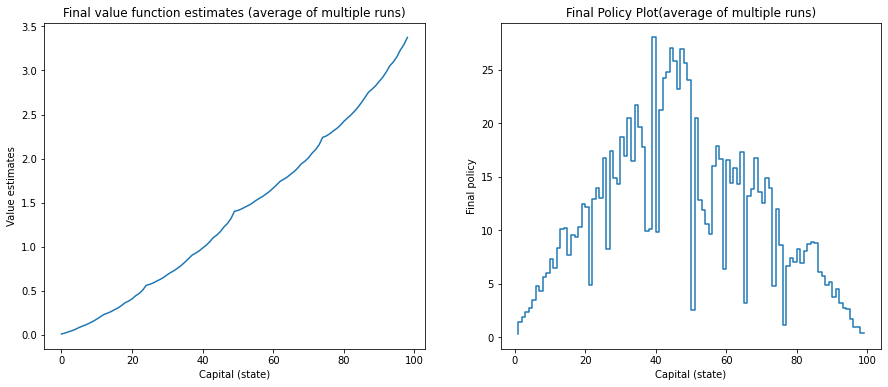

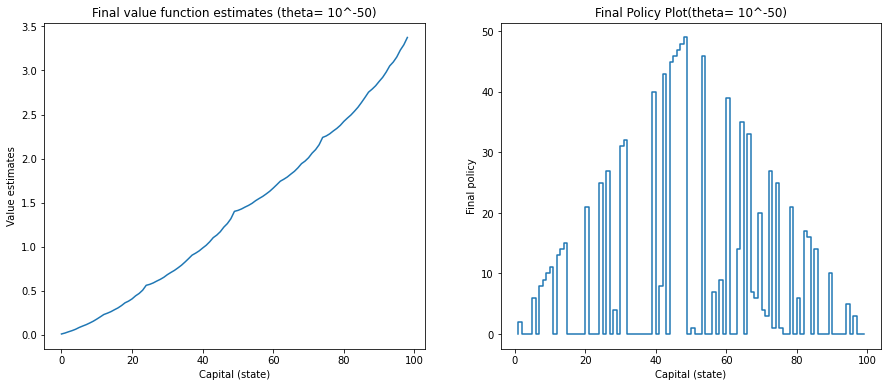

In [7]:
np.random.seed(235)
states = np.arange(1,100)
gamma =  1
theta = 10**-4
pr_h = 0.4

def reward(s, a):
    # this function should return a scalar reward
    #--- Your code here ---#
    if s+a == 100:
        r = 1
    else:
        r = 0
    return r

policy = []
V_theta = []
plt.figure(figsize=(15,6))
for theta in np.logspace(-1, -50, num=50):
    delta = 10
    V = np.zeros(len(states)+2)
    V[100] = 1
    while True:
        delta = 0
        for s in states:
            action = np.arange(0,min(s,100-s)+1)
            v = V[s]
            V_tmp = np.array([pr_h*(reward(s,a)+gamma*V[s+a])+(1-pr_h)*(reward(s,a)+gamma*V[s-a]) for a in action])
            V[s] = np.max(V_tmp)
            delta = np.maximum(delta,np.abs(v-V[s]))
        if delta < theta:
            break

    plt.subplot(121)
    plt.plot(states,V[1:len(V)-1])
    plt.title('Final value function estimates (multiple runs)')
    plt.xlabel('Capital (state)')
    plt.ylabel('Value estimates')
    V_theta.append(V)
    pi = np.zeros(len(V))
    for s in states:
        action = np.arange(0,min(s,100-s)+1)
        pi_tmp = np.array([pr_h*(reward(s,a)+gamma*V[s+a])+(1-pr_h)*(reward(s,a)+gamma*V[s-a]) for a in action])
        pi[s] = np.random.choice(np.flatnonzero(pi_tmp == np.max(pi_tmp)))
    policy.append(pi.copy())
    plt.subplot(122)
    plt.step(states,pi[1:len(pi)-1])
    plt.title('Final Policy Plot(multiple runs)')
    plt.xlabel('Capital (state)')
    plt.ylabel('Final policy')
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(np.mean(np.array(V_theta),axis=0)[1:100])
plt.title('Final value function estimates (average of multiple runs)')
plt.xlabel('Capital (state)')
plt.ylabel('Value estimates')
plt.subplot(122)
plt.step(range(1,100),np.mean(np.array(policy),axis=0)[1:100])
plt.title('Final Policy Plot(average of multiple runs)')
plt.xlabel('Capital (state)')
plt.ylabel('Final policy')
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(V[1:100])
plt.title('Final value function estimates (theta= 10^-50)')
plt.xlabel('Capital (state)')
plt.ylabel('Value estimates')
plt.subplot(122)
plt.step(range(1,100),pi[1:100])
plt.title('Final Policy Plot(theta= 10^-50)')
plt.xlabel('Capital (state)')
plt.ylabel('Final policy')
plt.show()

> Answer: The algorithm is run for $\theta$ in the range of \[$10^{-1}, 10^{-50}$\]. The value function and final policy is obtained for different run and are shown in the plot. Three different plot is shown: i) all metrics in the same plot, Fig 1 above, ii) average of all metrics in the same plot, Fig 2 above, iii) all metrics for $\theta \to 0$. <br>There is so significant improvement in policy for $\theta \to 0$ as the solution saturates.